In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [20]:
import pandas as pd

# 生の文字列を使ってファイルパスを指定
file_path = r'C:\Users\nakan\Programing\.gpt\rawdata.csv'

# Excelファイルを読み込む
df = pd.read_csv(file_path)

# データの確認
print(df.tail())
print(df.info())


      ID  SEX  AGE  No2_Expensive  No2_Cheap  No2_TooExpensive  No2_TooCheap  \
198  216    1    9            100         70               100            65   
199  217    1    6             70         40                70            20   
200  218    2    4            100         80               100            20   
201  219    2    8             80         50               100            20   
202  220    2   11            100         50               100            30   

     No3_Expensive  No3_Cheap  No3_TooExpensive  ...  No8_Cheap  \
198             90         80               100  ...         70   
199             70         40                70  ...         50   
200            100         80               100  ...         80   
201             60         20                80  ...         80   
202            150         50               110  ...         80   

     No8_TooExpensive  No8_TooCheap  Shopping_frequency  Cooking_Frequency  \
198               100            60   

In [3]:
def PSM(df, Number):
    # 各質問に対する列名の定義
    too_cheap_col = f'No{Number}_TooCheap'
    too_expensive_col = f'No{Number}_TooExpensive'
    cheap_col = f'No{Number}_Cheap'
    expensive_col = f'No{Number}_Expensive'

    # データをソート
    df_sorted = df.sort_values(by=[too_cheap_col, too_expensive_col, cheap_col, expensive_col])

    # 価格の範囲を設定（0円から最大値まで10円刻み）
    price_range = np.arange(0, df_sorted[[too_cheap_col, too_expensive_col, cheap_col, expensive_col]].max().max() + 10, 10)

    # 各価格ポイントでの累積分布を計算
    too_cheap_cdf = np.array([(df_sorted[too_cheap_col] >= price).mean() for price in price_range])
    too_expensive_cdf = np.array([(df_sorted[too_expensive_col] <= price).mean() for price in price_range])
    cheap_cdf = np.array([(df_sorted[cheap_col] >= price).mean() for price in price_range])
    expensive_cdf = np.array([(df_sorted[expensive_col] <= price).mean() for price in price_range])

    # 線形補間関数を作成
    f_too_cheap = interp1d(price_range, too_cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_cheap = interp1d(price_range, cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_expensive = interp1d(price_range, expensive_cdf, bounds_error=False, fill_value="extrapolate")
    f_too_expensive = interp1d(price_range, too_expensive_cdf, bounds_error=False, fill_value="extrapolate")

    # 交点を見つけるための関数
    def find_intersection(func1, func2, x_range):
        differences = np.abs(func1(x_range) - func2(x_range))
        min_diff_index = np.argmin(differences)
        return x_range[min_diff_index], (func1(x_range[min_diff_index]) + func2(x_range[min_diff_index])) / 2

    # 交点を計算
    too_expensive_vs_cheap, too_expensive_vs_cheap_y = find_intersection(f_too_expensive, f_cheap, price_range)
    expensive_vs_cheap, expensive_vs_cheap_y = find_intersection(f_expensive, f_cheap, price_range)
    too_expensive_vs_too_cheap, too_expensive_vs_too_cheap_y = find_intersection(f_too_expensive, f_too_cheap, price_range)
    expensive_vs_too_cheap, expensive_vs_too_cheap_y = find_intersection(f_expensive, f_too_cheap, price_range)

    # 結果の表示
    print(f"IPP: {expensive_vs_cheap}")
    print(f"OPP: {too_expensive_vs_too_cheap}")
    print(f"HAP: {too_expensive_vs_cheap}")
    print(f"LAP: {expensive_vs_too_cheap}")

    # 累積分布の集計表を作成
    cumulative_df = pd.DataFrame({
        'Price': price_range,
        'Too_Cheap_CDF': too_cheap_cdf,
        'Too_Expensive_CDF': too_expensive_cdf,
        'Cheap_CDF': cheap_cdf,
        'Expensive_CDF': expensive_cdf
    })
    
    # 累積分布の集計表を表示
    print(cumulative_df)

    # プロットの作成
    plt.figure(figsize=(10, 6))
    plt.plot(price_range, too_cheap_cdf, label='Too Cheap')
    plt.plot(price_range, cheap_cdf, label='Cheap')
    plt.plot(price_range, expensive_cdf, label='Expensive')
    plt.plot(price_range, too_expensive_cdf, label='Too Expensive')

    # 交点をプロット
    plt.scatter([too_expensive_vs_cheap], [too_expensive_vs_cheap_y], color='red', label='Too Expensive vs Cheap')
    plt.scatter([expensive_vs_cheap], [expensive_vs_cheap_y], color='green', label='Expensive vs Cheap')
    plt.scatter([too_expensive_vs_too_cheap], [too_expensive_vs_too_cheap_y], color='blue', label='Too Expensive vs Too Cheap')
    plt.scatter([expensive_vs_too_cheap], [expensive_vs_too_cheap_y], color='purple', label='Expensive vs Too Cheap')

    # プロットの装飾
    plt.xlabel('Price')
    plt.ylabel('Cumulative Distribution')
    plt.title('Price Sensitivity Meter (PSM) Analysis')
    plt.legend()
    plt.grid(True)

    # プロットの表示
    plt.show()



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def PSM2(df, Number):
    # 各質問に対する列名の定義
    too_cheap_col = f'No{Number}_TooCheap'
    too_expensive_col = f'No{Number}_TooExpensive'
    cheap_col = f'No{Number}_Cheap'
    expensive_col = f'No{Number}_Expensive'

    # データをソート
    df_sorted = df.sort_values(by=[too_cheap_col, too_expensive_col, cheap_col, expensive_col])

    # 価格の範囲を設定（0円から最大値まで10円刻み）
    price_range = np.arange(0, df_sorted[[too_cheap_col, too_expensive_col, cheap_col, expensive_col]].max().max() + 10, 10)

    # 各価格ポイントでの累積分布を計算
    too_cheap_cdf = np.array([(df_sorted[too_cheap_col] >= price).mean() for price in price_range])
    too_expensive_cdf = np.array([(df_sorted[too_expensive_col] <= price).mean() for price in price_range])
    cheap_cdf = np.array([(df_sorted[cheap_col] >= price).mean() for price in price_range])
    expensive_cdf = np.array([(df_sorted[expensive_col] <= price).mean() for price in price_range])

    # 線形補間関数を作成
    f_too_cheap = interp1d(price_range, too_cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_cheap = interp1d(price_range, cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_expensive = interp1d(price_range, expensive_cdf, bounds_error=False, fill_value="extrapolate")
    f_too_expensive = interp1d(price_range, too_expensive_cdf, bounds_error=False, fill_value="extrapolate")

    # 交点を見つけるための関数
    def find_intersection(func1, func2, x_range):
        differences = np.abs(func1(x_range) - func2(x_range))
        min_diff_index = np.argmin(differences)
        return x_range[min_diff_index], (func1(x_range[min_diff_index]) + func2(x_range[min_diff_index])) / 2

    # 交点を計算
    too_expensive_vs_cheap, too_expensive_vs_cheap_y = find_intersection(f_too_expensive, f_cheap, price_range)
    expensive_vs_cheap, expensive_vs_cheap_y = find_intersection(f_expensive, f_cheap, price_range)
    too_expensive_vs_too_cheap, too_expensive_vs_too_cheap_y = find_intersection(f_too_expensive, f_too_cheap, price_range)
    expensive_vs_too_cheap, expensive_vs_too_cheap_y = find_intersection(f_expensive, f_too_cheap, price_range)

    # 結果の表示
    print(f"IPP: {expensive_vs_cheap}")
    print(f"OPP: {too_expensive_vs_too_cheap}")
    print(f"HAP: {too_expensive_vs_cheap}")
    print(f"LAP: {expensive_vs_too_cheap}")

    # 累積分布の集計表を作成
    cumulative_df = pd.DataFrame({
        'Price': price_range,
        'Too_Cheap_CDF': too_cheap_cdf,
        'Too_Expensive_CDF': too_expensive_cdf,
        'Cheap_CDF': cheap_cdf,
        'Expensive_CDF': expensive_cdf
    })
    
    # 累積分布の集計表を表示
    print(cumulative_df)

    # プロットの作成
    plt.figure(figsize=(10, 6))
    plt.plot(price_range, too_cheap_cdf, label='Too Cheap')
    plt.plot(price_range, cheap_cdf, label='Cheap')
    plt.plot(price_range, expensive_cdf, label='Expensive')
    plt.plot(price_range, too_expensive_cdf, label='Too Expensive')

    # 交点をプロット
    plt.scatter([too_expensive_vs_cheap], [too_expensive_vs_cheap_y], color='red', label='Too Expensive vs Cheap', zorder=5)
    plt.scatter([expensive_vs_cheap], [expensive_vs_cheap_y], color='green', label='Expensive vs Cheap', zorder=5)
    plt.scatter([too_expensive_vs_too_cheap], [too_expensive_vs_too_cheap_y], color='blue', label='Too Expensive vs Too Cheap', zorder=5)
    plt.scatter([expensive_vs_too_cheap], [expensive_vs_too_cheap_y], color='purple', label='Expensive vs Too Cheap', zorder=5)

    # プロットの装飾
    plt.xlabel('Price')
    plt.ylabel('Cumulative Distribution')
    plt.title('Price Sensitivity Meter (PSM) Analysis')
    plt.legend()
    plt.grid(True)

    # プロットの表示
    plt.show()



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def PSM3(df, Number):
    # 各質問に対する列名の定義
    too_cheap_col = f'No{Number}_TooCheap'
    too_expensive_col = f'No{Number}_TooExpensive'
    cheap_col = f'No{Number}_Cheap'
    expensive_col = f'No{Number}_Expensive'

    # データをソート
    df_sorted = df.sort_values(by=[too_cheap_col, too_expensive_col, cheap_col, expensive_col])

    # 価格の範囲を設定（0円から最大値まで1円刻み）
    price_range = np.arange(0, df_sorted[[too_cheap_col, too_expensive_col, cheap_col, expensive_col]].max().max() + 1, 1)

    # 各価格ポイントでの累積分布を計算
    too_cheap_cdf = np.array([(df_sorted[too_cheap_col] >= price).mean() for price in price_range])
    too_expensive_cdf = np.array([(df_sorted[too_expensive_col] <= price).mean() for price in price_range])
    cheap_cdf = np.array([(df_sorted[cheap_col] >= price).mean() for price in price_range])
    expensive_cdf = np.array([(df_sorted[expensive_col] <= price).mean() for price in price_range])

    # 線形補間関数を作成
    f_too_cheap = interp1d(price_range, too_cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_cheap = interp1d(price_range, cheap_cdf, bounds_error=False, fill_value="extrapolate")
    f_expensive = interp1d(price_range, expensive_cdf, bounds_error=False, fill_value="extrapolate")
    f_too_expensive = interp1d(price_range, too_expensive_cdf, bounds_error=False, fill_value="extrapolate")

    # 交点を見つけるための関数
    def find_intersection(func1, func2, x_range):
        differences = np.abs(func1(x_range) - func2(x_range))
        min_diff_index = np.argmin(differences)
        return x_range[min_diff_index], (func1(x_range[min_diff_index]) + func2(x_range[min_diff_index])) / 2

    # 交点を計算
    too_expensive_vs_cheap, too_expensive_vs_cheap_y = find_intersection(f_too_expensive, f_cheap, price_range)
    expensive_vs_cheap, expensive_vs_cheap_y = find_intersection(f_expensive, f_cheap, price_range)
    too_expensive_vs_too_cheap, too_expensive_vs_too_cheap_y = find_intersection(f_too_expensive, f_too_cheap, price_range)
    expensive_vs_too_cheap, expensive_vs_too_cheap_y = find_intersection(f_expensive, f_too_cheap, price_range)

    # 結果の表示
    print(f"IPP: {expensive_vs_cheap}")
    print(f"OPP: {too_expensive_vs_too_cheap}")
    print(f"HAP: {too_expensive_vs_cheap}")
    print(f"LAP: {expensive_vs_too_cheap}")

    # 累積分布の集計表を作成
    cumulative_df = pd.DataFrame({
        'Price': price_range,
        'Too_Cheap_CDF': too_cheap_cdf,
        'Too_Expensive_CDF': too_expensive_cdf,
        'Cheap_CDF': cheap_cdf,
        'Expensive_CDF': expensive_cdf
    })
    
    # 累積分布の集計表を表示
    print(cumulative_df)

    # プロットの作成
    plt.figure(figsize=(10, 6))
    plt.plot(price_range, too_cheap_cdf, label='Too Cheap')
    plt.plot(price_range, cheap_cdf, label='Cheap')
    plt.plot(price_range, expensive_cdf, label='Expensive')
    plt.plot(price_range, too_expensive_cdf, label='Too Expensive')

    # 交点をプロット
    plt.scatter([too_expensive_vs_cheap], [too_expensive_vs_cheap_y], color='red', label='HAP', zorder=5)
    plt.scatter([expensive_vs_cheap], [expensive_vs_cheap_y], color='green', label='IPP', zorder=5)
    plt.scatter([too_expensive_vs_too_cheap], [too_expensive_vs_too_cheap_y], color='blue', label='OPP', zorder=5)
    plt.scatter([expensive_vs_too_cheap], [expensive_vs_too_cheap_y], color='purple', label='LAP', zorder=5)

    # プロットの装飾
    plt.xlabel('Price')
    plt.ylabel('Cumulative Distribution')
    plt.title('Price Sensitivity Meter (PSM) Analysis')
    plt.legend()
    plt.grid(True)

    # プロットの表示
    plt.show()




IPP: 69
OPP: 52
HAP: 71
LAP: 51
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.000000        1.0       0.000000
1        1       0.985222           0.000000        1.0       0.000000
2        2       0.980296           0.000000        1.0       0.000000
3        3       0.980296           0.000000        1.0       0.000000
4        4       0.980296           0.000000        1.0       0.000000
..     ...            ...                ...        ...            ...
296    296       0.004926           0.990148        0.0       0.995074
297    297       0.004926           0.990148        0.0       0.995074
298    298       0.004926           0.990148        0.0       0.995074
299    299       0.004926           0.990148        0.0       0.995074
300    300       0.004926           1.000000        0.0       1.000000

[301 rows x 5 columns]


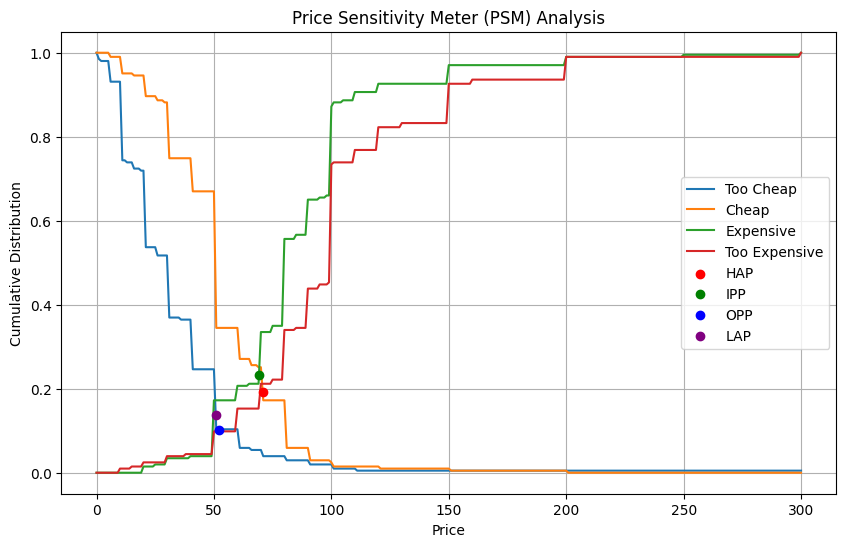

In [6]:
PSM3(df,2)

IPP: 59
OPP: 50
HAP: 60
LAP: 48
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000                0.0   1.000000       0.000000
1        1       0.980296                0.0   1.000000       0.000000
2        2       0.965517                0.0   0.995074       0.000000
3        3       0.965517                0.0   0.995074       0.000000
4        4       0.965517                0.0   0.995074       0.000000
..     ...            ...                ...        ...            ...
396    396       0.000000                1.0   0.000000       0.995074
397    397       0.000000                1.0   0.000000       0.995074
398    398       0.000000                1.0   0.000000       0.995074
399    399       0.000000                1.0   0.000000       0.995074
400    400       0.000000                1.0   0.000000       1.000000

[401 rows x 5 columns]


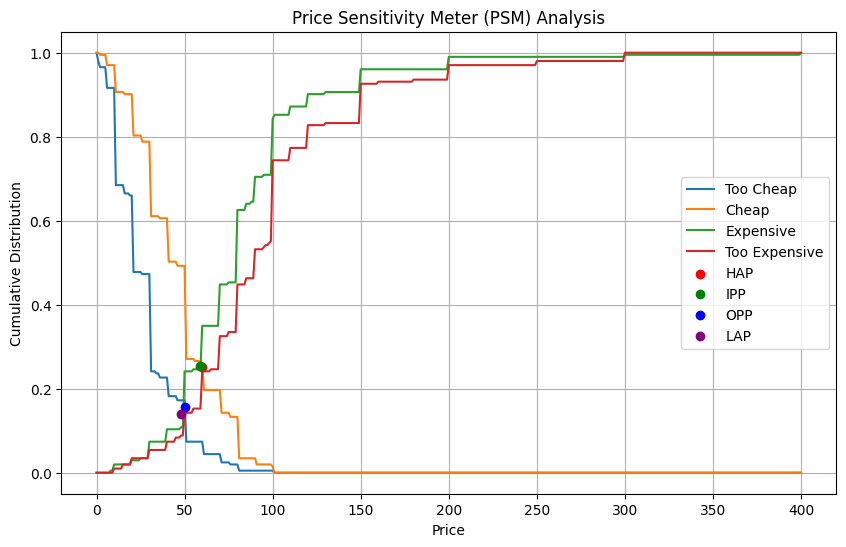

In [7]:
PSM3(df,3)

IPP: 55
OPP: 50
HAP: 60
LAP: 50
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.000000   1.000000            0.0
1        1       0.985222           0.004926   1.000000            0.0
2        2       0.980296           0.004926   0.995074            0.0
3        3       0.980296           0.004926   0.995074            0.0
4        4       0.980296           0.004926   0.995074            0.0
..     ...            ...                ...        ...            ...
496    496       0.000000           0.995074   0.000000            1.0
497    497       0.000000           0.995074   0.000000            1.0
498    498       0.000000           0.995074   0.000000            1.0
499    499       0.000000           0.995074   0.000000            1.0
500    500       0.000000           1.000000   0.000000            1.0

[501 rows x 5 columns]


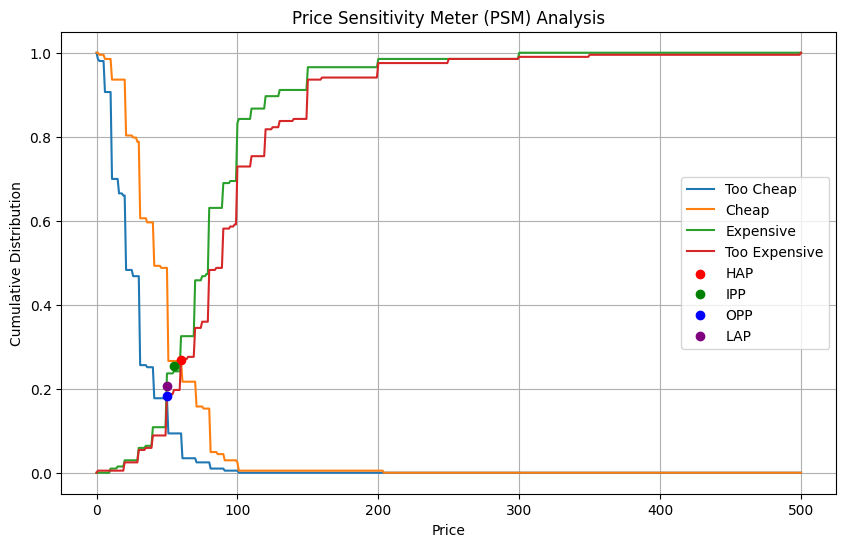

In [8]:
PSM3(df,4)

IPP: 70
OPP: 51
HAP: 71
LAP: 51
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.000000   1.000000       0.000000
1        1       0.980296           0.004926   1.000000       0.004926
2        2       0.975369           0.004926   0.995074       0.004926
3        3       0.975369           0.004926   0.995074       0.004926
4        4       0.975369           0.004926   0.995074       0.004926
..     ...            ...                ...        ...            ...
405    405       0.000000           1.000000   0.004926       1.000000
406    406       0.000000           1.000000   0.004926       1.000000
407    407       0.000000           1.000000   0.004926       1.000000
408    408       0.000000           1.000000   0.004926       1.000000
409    409       0.000000           1.000000   0.004926       1.000000

[410 rows x 5 columns]


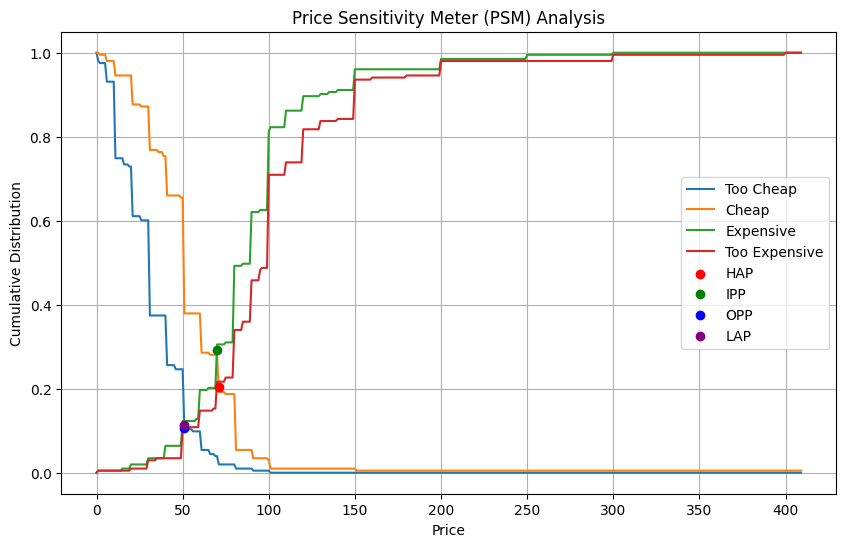

In [9]:
PSM3(df,5)

IPP: 68
OPP: 56
HAP: 70
LAP: 51
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.004926   1.000000       0.000000
1        1       0.975369           0.009852   1.000000       0.004926
2        2       0.960591           0.009852   0.995074       0.004926
3        3       0.960591           0.009852   0.995074       0.004926
4        4       0.960591           0.009852   0.995074       0.004926
..     ...            ...                ...        ...            ...
346    346       0.000000           0.995074   0.000000       1.000000
347    347       0.000000           0.995074   0.000000       1.000000
348    348       0.000000           0.995074   0.000000       1.000000
349    349       0.000000           0.995074   0.000000       1.000000
350    350       0.000000           1.000000   0.000000       1.000000

[351 rows x 5 columns]


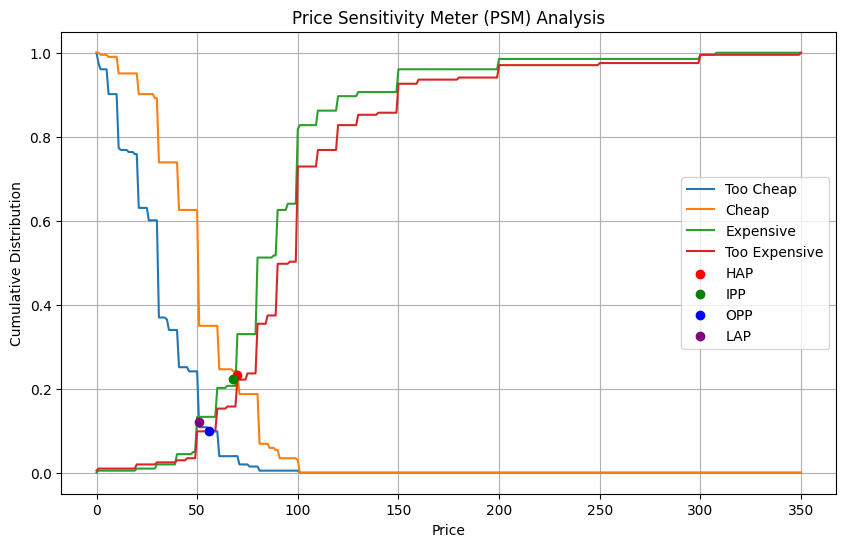

In [10]:
PSM3(df,6)

IPP: 68
OPP: 51
HAP: 70
LAP: 51
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.000000   1.000000       0.000000
1        1       0.980296           0.004926   1.000000       0.004926
2        2       0.970443           0.004926   0.995074       0.004926
3        3       0.970443           0.004926   0.995074       0.004926
4        4       0.965517           0.004926   0.995074       0.004926
..     ...            ...                ...        ...            ...
696    696       0.000000           0.995074   0.000000       1.000000
697    697       0.000000           0.995074   0.000000       1.000000
698    698       0.000000           0.995074   0.000000       1.000000
699    699       0.000000           0.995074   0.000000       1.000000
700    700       0.000000           1.000000   0.000000       1.000000

[701 rows x 5 columns]


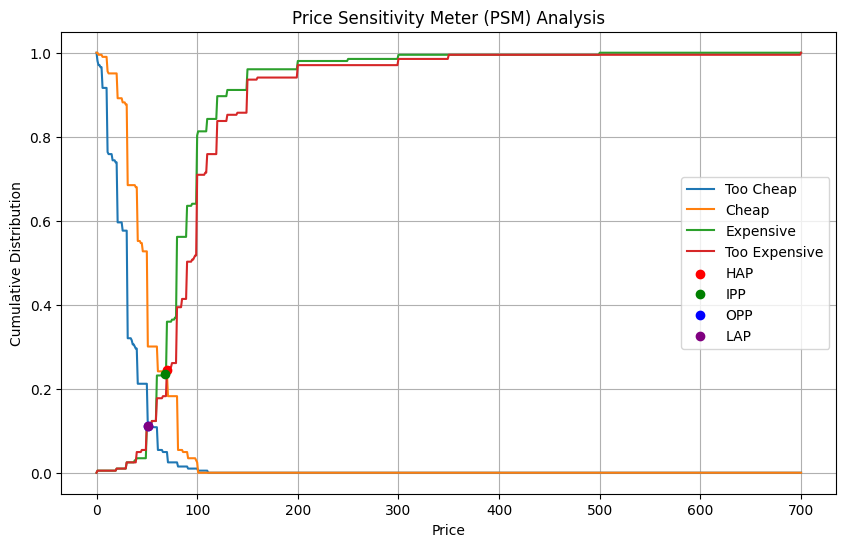

In [11]:
PSM3(df,7)

IPP: 80
OPP: 70
HAP: 81
LAP: 70
     Price  Too_Cheap_CDF  Too_Expensive_CDF  Cheap_CDF  Expensive_CDF
0        0       1.000000           0.000000   1.000000       0.000000
1        1       0.980296           0.004926   1.000000       0.004926
2        2       0.975369           0.004926   0.995074       0.004926
3        3       0.975369           0.004926   0.995074       0.004926
4        4       0.975369           0.004926   0.995074       0.004926
..     ...            ...                ...        ...            ...
856    856       0.000000           0.995074   0.000000       1.000000
857    857       0.000000           0.995074   0.000000       1.000000
858    858       0.000000           0.995074   0.000000       1.000000
859    859       0.000000           0.995074   0.000000       1.000000
860    860       0.000000           1.000000   0.000000       1.000000

[861 rows x 5 columns]


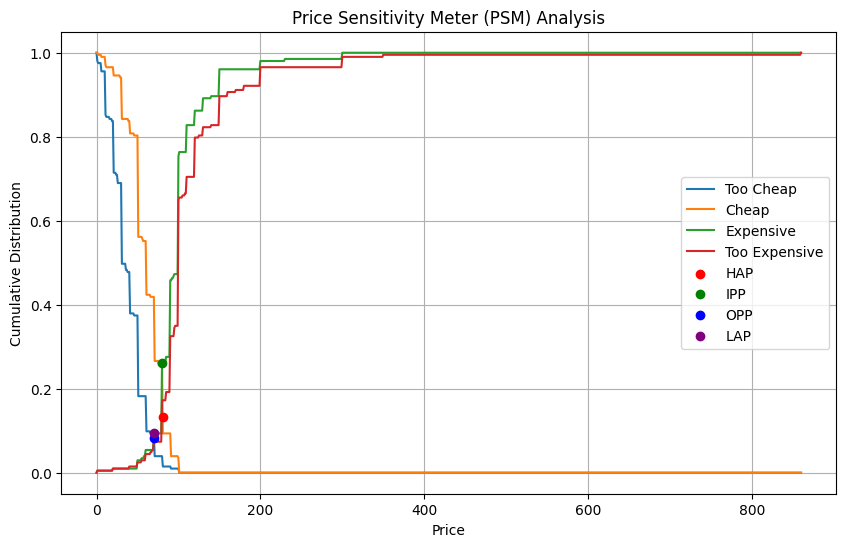

In [12]:
PSM3(df,8)

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# データフレームの作成
data = pd.DataFrame({
    'A': [0, 1, 0, 1, 0, 1, 0, 1],
    'B': [0, 0, 1, 1, 0, 0, 1, 1],
    'C': [0, 0, 0, 0, 1, 1, 1, 1],
    'score': [100, 68, 70, 59, 80, 68, 69, 55]
})

# A, B, C をカテゴリカル変数として指定
data['A'] = data['A'].astype('category')
data['B'] = data['B'].astype('category')
data['C'] = data['C'].astype('category')

# ANOVAモデルの作成（交互作用を減らす）
model = ols('score ~ A + B + C', data=data).fit()

# ANOVA表の出力
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


           sum_sq   df          F    PR(>F)
A         595.125  1.0  13.564103  0.021149
B         496.125  1.0  11.307692  0.028234
C          78.125  1.0   1.780627  0.252969
Residual  175.500  4.0        NaN       NaN


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# データフレームの作成
data = pd.DataFrame({
    'A': [0, 1, 0, 1, 0, 1, 0, 1],
    'B': [0, 0, 1, 1, 0, 0, 1, 1],
    'C': [0, 0, 0, 0, 1, 1, 1, 1],
    'score': [100, 56, 51, 50, 70, 51, 52, 50]
})

# A, B, C をカテゴリカル変数として指定
data['A'] = data['A'].astype('category')
data['B'] = data['B'].astype('category')
data['C'] = data['C'].astype('category')

# ANOVAモデルの作成（交互作用を減らす）
model = ols('score ~ A + B + C', data=data).fit()

# ANOVA表の出力
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

          sum_sq   df         F    PR(>F)
A          544.5  1.0  2.834092  0.167570
B          684.5  1.0  3.562785  0.132126
C          144.5  1.0  0.752115  0.434736
Residual   768.5  4.0       NaN       NaN


In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# データフレームの作成
data = pd.DataFrame({
    'A': [0, 1, 0, 1, 0, 1, 0, 1],
    'B': [0, 0, 1, 1, 0, 0, 1, 1],
    'C': [0, 0, 0, 0, 1, 1, 1, 1],
    'score': [100, 62, 60.5, 54.5, 75, 59.5, 60.5, 52.5]
})

# A, B, C をカテゴリカル変数として指定
data['A'] = data['A'].astype('category')
data['B'] = data['B'].astype('category')
data['C'] = data['C'].astype('category')

# ANOVAモデルの作成（交互作用を減らす）
model = ols('score ~ A + B + C', data=data).fit()

# ANOVA表の出力
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

             sum_sq   df         F    PR(>F)
A         569.53125  1.0  5.640669  0.076403
B         586.53125  1.0  5.809037  0.073539
C         108.78125  1.0  1.077375  0.357909
Residual  403.87500  4.0       NaN       NaN


In [16]:
# ANOVAモデルの作成（A×B×C以外の交互作用を含める）
model_interactions = ols('score ~ A * B + A * C + B * C', data=data).fit()

# ANOVA表の出力
anova_table_interactions = sm.stats.anova_lm(model_interactions, typ=2)
anova_table_interactions


,sum_sq,df,F,PR(>F)
A,569.53125,1.0,7.590587,0.221656
B,586.53125,1.0,7.817160,0.218670
C,108.78125,1.0,1.449813,0.441221
A:B,195.03125,1.0,2.599334,0.353438
A:C,52.53125,1.0,0.700125,0.556440
B:C,81.28125,1.0,1.083299,0.487269
Residual,75.03125,1.0,NaN,NaN


In [17]:
# データフレームの作成
data = pd.DataFrame({
    'A': [0, 1, 0, 1, 0, 1, 0, 1],
    'B': [0, 0, 1, 1, 0, 0, 1, 1],
    'C': [0, 0, 0, 0, 1, 1, 1, 1],
    'score': [100, 60, 60, 50, 70, 60, 60, 50]
})

In [18]:
import pandas as pd

# データフレームの作成
data = pd.DataFrame({
    'A': [0, 1, 0, 1, 0, 1, 0, 1],
    'B': [0, 0, 1, 1, 0, 0, 1, 1],
    'C': [0, 0, 0, 0, 1, 1, 1, 1],
    'score': [100, 68, 70, 59, 80, 68, 69, 55]
})

# 各要因の水準ごとの平均値を計算
mean_A = data.groupby('A')['score'].mean()
mean_B = data.groupby('B')['score'].mean()
mean_C = data.groupby('C')['score'].mean()

# 全体の平均値を計算
overall_mean = data['score'].mean()

# 主効果の計算
main_effect_A = mean_A - overall_mean
main_effect_B = mean_B - overall_mean
main_effect_C = mean_C - overall_mean

# 結果の表示
main_effects = {
    'A': main_effect_A,
    'B': main_effect_B,
    'C': main_effect_C
}

main_effects


{'A': A
 0    8.625
 1   -8.625
 Name: score, dtype: float64,
 'B': B
 0    7.875
 1   -7.875
 Name: score, dtype: float64,
 'C': C
 0    3.125
 1   -3.125
 Name: score, dtype: float64}